In [81]:
import matplotlib.pyplot as plt
import numpy as np
import focusfield as ff

In [82]:
# Define szstem for red color
opt_red = ff.Optics(
    na=1.42,
    magnification=60,
    f_tube_lens=180e-3,
    n_lens=1.518,
    n_media=1.518,
    n_sample=1.518,
    fill_factor=1.72,
    wavelength=635e-9,
    power=1e-3,
)

# Define system for green color
opt_green = ff.Optics(
    na=1.42,
    magnification=60,
    f_tube_lens=180e-3,
    n_lens=1.518,
    n_media=1.518,
    n_sample=1.518,
    fill_factor=1.72,
    wavelength=561e-9,
    power=1e-3,
)

# Our real magnification is larger because we are using a 300mm lens for tube lens...
spc = ff.Spaces(
    opt=opt_red,
    rng_x=1500e-9,
    rng_y=1500e-9,
    rng_z=1500e-9,
    dr=20e-9,
    dz=20e-9,
)

2025-02-20 10:21:21 nbw-imp-368 focusfield.spaces[16756] DEBUG Calculate spaces
2025-02-20 10:21:21 nbw-imp-368 focusfield.spaces[16756] DEBUG Condition: n1 > n2


# Halfmoon in x - Polarization in X

2025-02-20 10:21:42 nbw-imp-368 focusfield.fieldin[16756] DEBUG Calculate input field


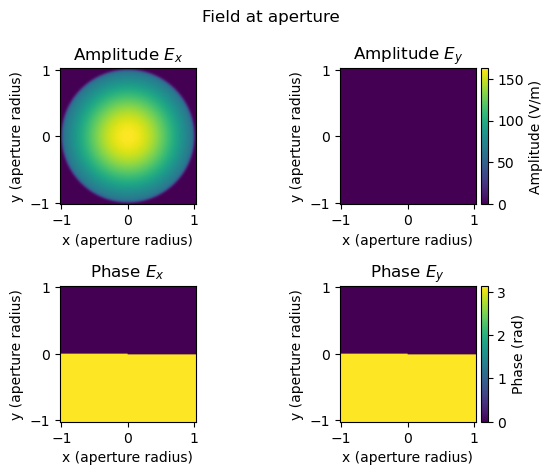

2025-02-20 10:21:43 nbw-imp-368 focusfield.fieldin[16756] DEBUG Calculate input field
2025-02-20 10:21:43 nbw-imp-368 focusfield.calculator[16756] INFO Start field calculation
100%|██████████| 77/77 [00:00<00:00, 163.28it/s]


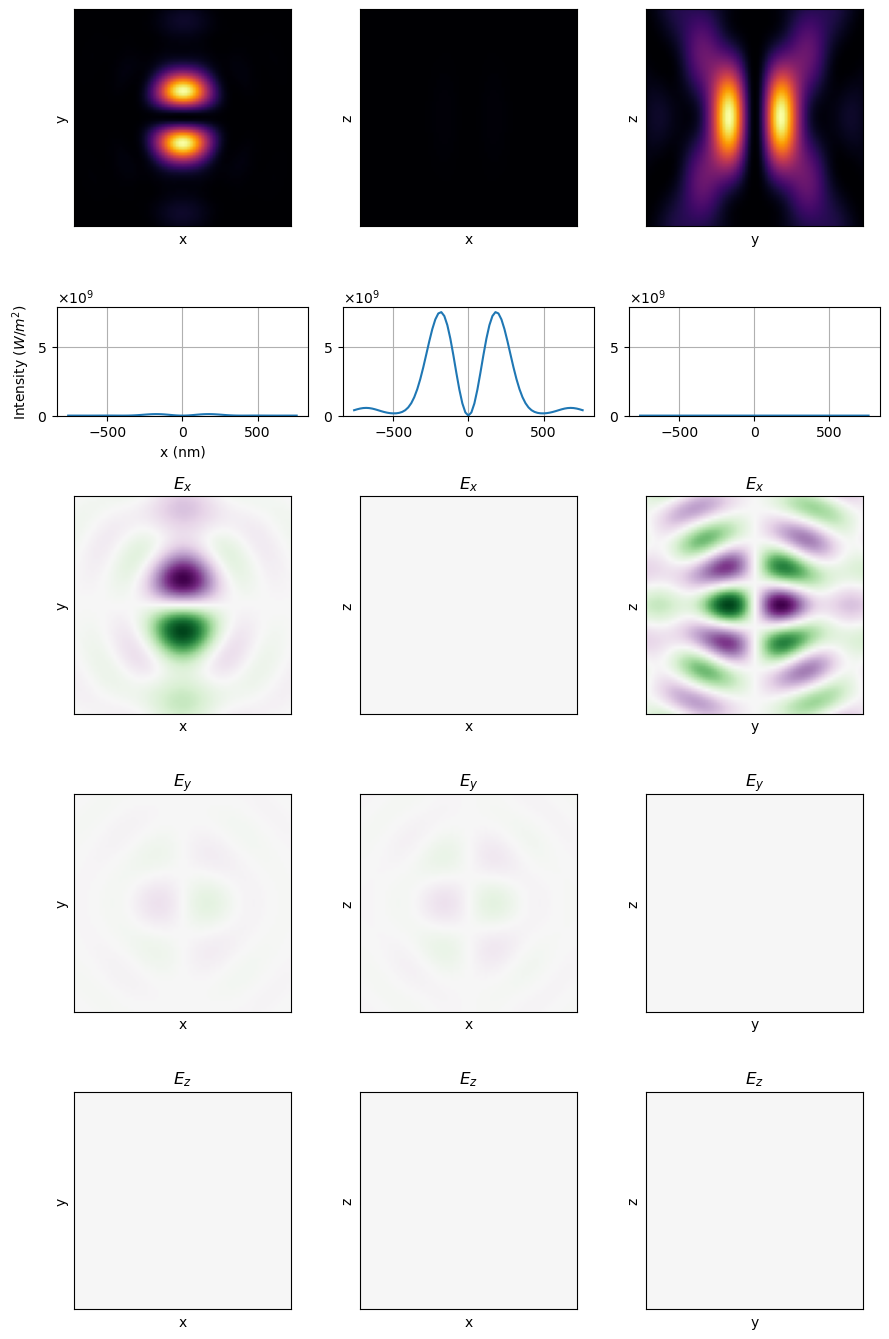

(<Figure size 900x1350 with 15 Axes>,
 array([[<Axes: xlabel='x', ylabel='y'>, <Axes: xlabel='x', ylabel='z'>,
         <Axes: xlabel='y', ylabel='z'>],
        [<Axes: xlabel='x (nm)', ylabel='Intensity $(W/m^2)$'>, <Axes: >,
         <Axes: >],
        [<Axes: title={'center': '$E_x$'}, xlabel='x', ylabel='y'>,
         <Axes: title={'center': '$E_x$'}, xlabel='x', ylabel='z'>,
         <Axes: title={'center': '$E_x$'}, xlabel='y', ylabel='z'>],
        [<Axes: title={'center': '$E_y$'}, xlabel='x', ylabel='y'>,
         <Axes: title={'center': '$E_y$'}, xlabel='x', ylabel='z'>,
         <Axes: title={'center': '$E_y$'}, xlabel='y', ylabel='z'>],
        [<Axes: title={'center': '$E_z$'}, xlabel='x', ylabel='y'>,
         <Axes: title={'center': '$E_z$'}, xlabel='x', ylabel='z'>,
         <Axes: title={'center': '$E_z$'}, xlabel='y', ylabel='z'>]],
       dtype=object),
 <focusfield.fieldplot.Plotter at 0x2571ffb8990>)

In [84]:
fldin = ff.FieldIn(spc)
fldin += ff.fieldmod.Initialize(polarization=ff.Polarization.X)
fldin += ff.fieldmod.Gauss(w_diameter=1.0)
fldin += ff.fieldmod.Halfmoon(angle=0)
fldin.calculate()
fldin.plot()
fldout = ff.calculate_focus(fldin)
fldout.plot(i_profile=True, e_image=True)#, e_profile=True)

# Halfmoon in x - Polarization in Y

2025-02-20 10:21:53 nbw-imp-368 focusfield.fieldin[16756] DEBUG Calculate input field


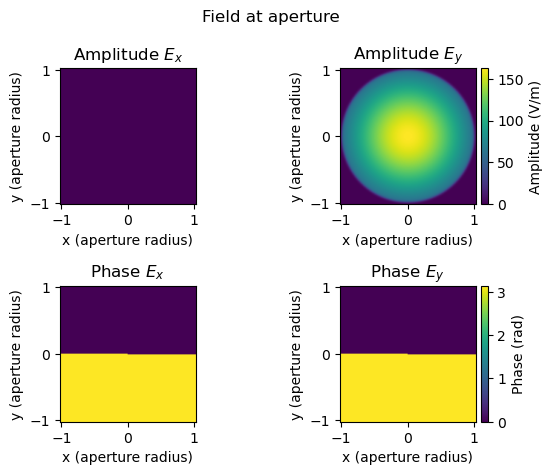

2025-02-20 10:21:53 nbw-imp-368 focusfield.fieldin[16756] DEBUG Calculate input field
2025-02-20 10:21:54 nbw-imp-368 focusfield.calculator[16756] INFO Start field calculation
100%|██████████| 77/77 [00:00<00:00, 171.98it/s]


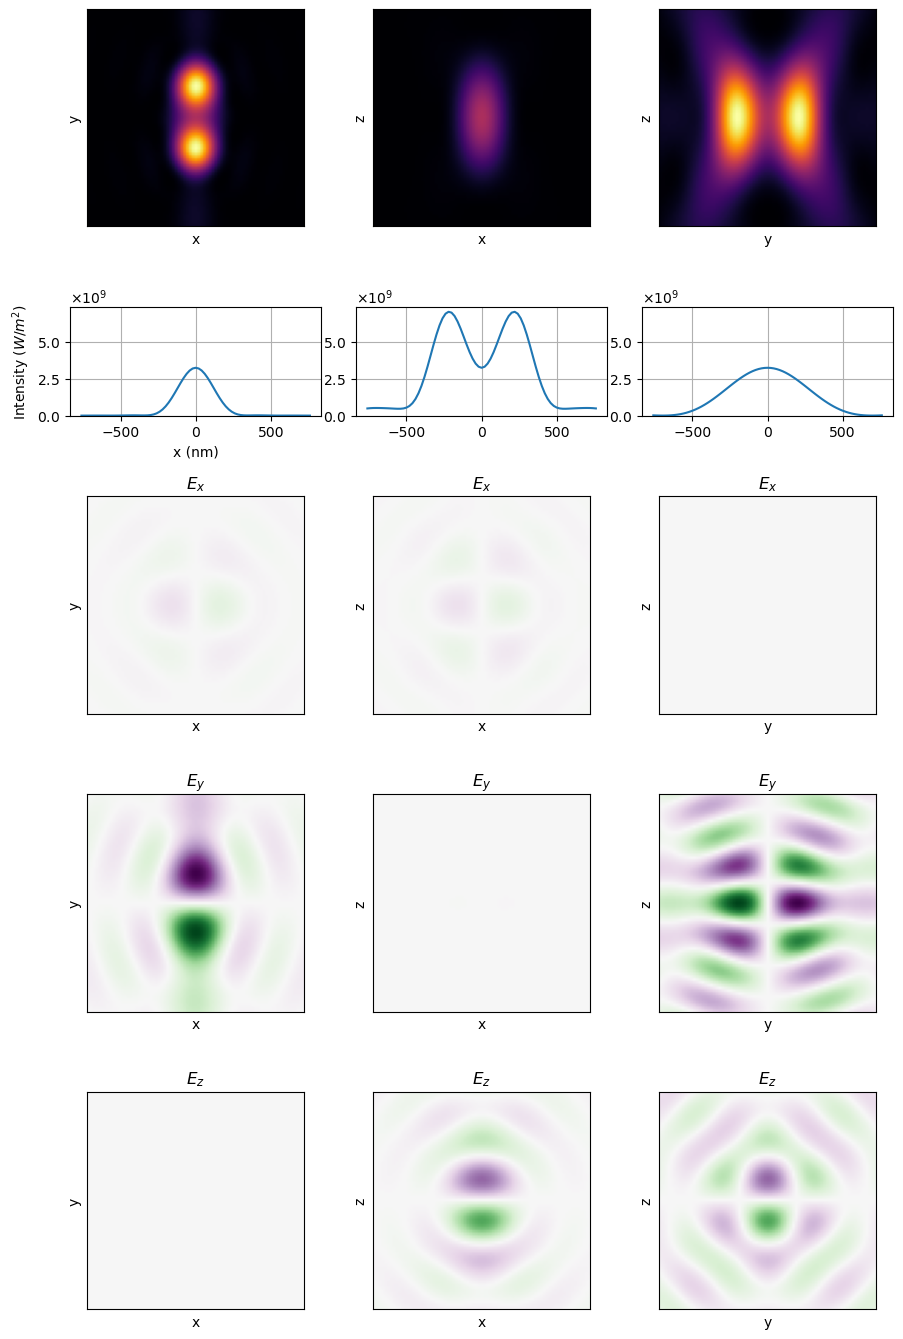

(<Figure size 900x1350 with 15 Axes>,
 array([[<Axes: xlabel='x', ylabel='y'>, <Axes: xlabel='x', ylabel='z'>,
         <Axes: xlabel='y', ylabel='z'>],
        [<Axes: xlabel='x (nm)', ylabel='Intensity $(W/m^2)$'>, <Axes: >,
         <Axes: >],
        [<Axes: title={'center': '$E_x$'}, xlabel='x', ylabel='y'>,
         <Axes: title={'center': '$E_x$'}, xlabel='x', ylabel='z'>,
         <Axes: title={'center': '$E_x$'}, xlabel='y', ylabel='z'>],
        [<Axes: title={'center': '$E_y$'}, xlabel='x', ylabel='y'>,
         <Axes: title={'center': '$E_y$'}, xlabel='x', ylabel='z'>,
         <Axes: title={'center': '$E_y$'}, xlabel='y', ylabel='z'>],
        [<Axes: title={'center': '$E_z$'}, xlabel='x', ylabel='y'>,
         <Axes: title={'center': '$E_z$'}, xlabel='x', ylabel='z'>,
         <Axes: title={'center': '$E_z$'}, xlabel='y', ylabel='z'>]],
       dtype=object),
 <focusfield.fieldplot.Plotter at 0x2572053e690>)

In [85]:
fldin = ff.FieldIn(spc)
fldin += ff.fieldmod.Initialize(polarization=ff.Polarization.Y)
fldin += ff.fieldmod.Gauss(w_diameter=1.0)
fldin += ff.fieldmod.Halfmoon(angle=0)
fldin.calculate()
fldin.plot()
fldout = ff.calculate_focus(fldin)
fldout.plot(i_profile=True, e_image=True)#, e_profile=True)

# Considerations

The only parameter changing which will not be able to compensate a fix lambda/4 waveplate is the Ellipticity changes due to the dielectric mirror. From measurements, we know each dielectric mirror at 45 degrees will introduce a change in ellipticity, during a rotation of +/- 0.8mrad, of max. 0.3 degree @635nm, and max. 0.6 degree @561nm.

All the consider polarizations will be linear. This means $\phi = 0$

The Stokes parameters are defined as:

$
S_0 = |E_x|^2 + |E_y|^2
$

$
S_1 = |E_x|^2 - |E_y|^2
$

$
S_2 = 2 \text{Re}(E_x E_y^*)
$

$
S_3 = 2 \text{Im}(E_x E_y^*)
$

For the Jones vector 

$\mathbf{E} = \begin{pmatrix} \cos \alpha \\ \sin \alpha \, e^{j \phi} \end{pmatrix}$

The Stokes parameters become:

$
S_0 = \cos^2 \alpha + \sin^2 \alpha = 1
$

$
S_1 = \cos^2 \alpha - \sin^2 \alpha = \cos 2\alpha
$

$
S_2 = 2 \cos \alpha \cdot \sin \alpha \cos \phi = \sin 2\alpha \cos \phi
$

$
S_3 = 2 \cos \alpha \cdot \sin \alpha \sin \phi = \sin 2\alpha \sin \phi
$

The Stokes parameters are related to the **azimuth angle** ($\psi$) and the **ellipticity angle** ($\chi$) by:

$
\tan 2\psi = \frac{S_2}{S_1}
$

$
\sin 2\chi = \frac{S_3}{S_0}
$

Using the stoke parameter's previous definition

$
\tan 2\psi = \frac{S_2}{S_1} = \frac{\sin 2\alpha \cos \phi}{\cos 2\alpha}
$

Simplify:

$
\tan 2\psi = \tan 2\alpha \cos \phi
$

$
\sin 2\chi = \frac{S_3}{S_0} = \sin 2\alpha \sin \phi
$


In [98]:
# variables
number_of_mirrors = 7
delta_per_mirror_in_rad = 1*np.pi/180

# Small sample space
_spc = ff.Spaces(
    opt=opt_green,
    rng_x=500e-9,
    rng_y=100e-9,
    rng_z=100e-9,
    dr=5e-9,
    dz=5e-9,
)

fldout = []
beam = []
for _mirror in range(number_of_mirrors):
    fldin = ff.FieldIn(_spc)
    fldin += ff.fieldmod.Initialize(alpha=_mirror*delta_per_mirror_in_rad, phi=0)
    fldin += ff.fieldmod.Gauss(w_diameter=1.0)
    fldin += ff.fieldmod.Halfmoon(angle=0)
    _fldout = ff.calculate_focus(fldin)
    fldout.append(_fldout)
    beam.append(_fldout.intensity)
beam = np.array(beam)

2025-02-20 10:55:48 nbw-imp-368 focusfield.spaces[16756] DEBUG Calculate spaces
2025-02-20 10:55:48 nbw-imp-368 focusfield.spaces[16756] DEBUG Condition: n1 > n2
2025-02-20 10:55:48 nbw-imp-368 focusfield.fieldin[16756] DEBUG Calculate input field
2025-02-20 10:55:48 nbw-imp-368 focusfield.calculator[16756] INFO Start field calculation
100%|██████████| 21/21 [00:00<00:00, 1239.38it/s]
2025-02-20 10:55:48 nbw-imp-368 focusfield.fieldin[16756] DEBUG Calculate input field
2025-02-20 10:55:48 nbw-imp-368 focusfield.calculator[16756] INFO Start field calculation
100%|██████████| 21/21 [00:00<00:00, 916.09it/s]
2025-02-20 10:55:48 nbw-imp-368 focusfield.fieldin[16756] DEBUG Calculate input field
2025-02-20 10:55:48 nbw-imp-368 focusfield.calculator[16756] INFO Start field calculation
100%|██████████| 21/21 [00:00<00:00, 1316.97it/s]
2025-02-20 10:55:48 nbw-imp-368 focusfield.fieldin[16756] DEBUG Calculate input field
2025-02-20 10:55:48 nbw-imp-368 focusfield.calculator[16756] INFO Start fie

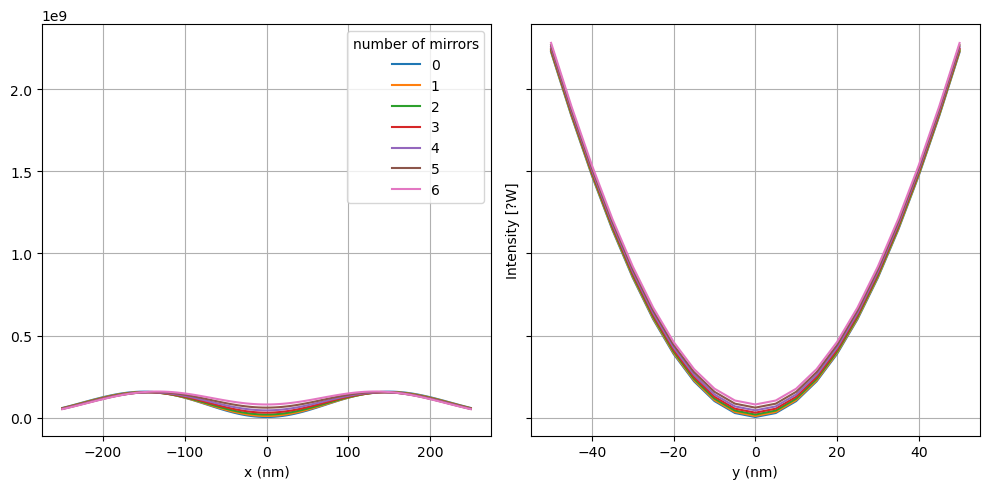

In [99]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)


axs[0].plot(
    _fldout.x * 1e9,
    np.squeeze(beam[:, :, _fldout.y == 0, _fldout.z == 0]).T,
)
axs[0].legend([f"{e}" for e in range(number_of_mirrors)], title="number of mirrors", loc="upper right")
axs[0].set_xlabel("x (nm)")
axs[0].grid()

axs[1].plot(
    _fldout.y * 1e9,
    np.squeeze(beam[:, _fldout.x == 0, :, _fldout.z == 0]).T,
)
axs[1].set_xlabel("y (nm)")
axs[1].set_ylabel("Intensity [?W]")
axs[1].grid()

plt.tight_layout()
plt.show()